<a href="https://colab.research.google.com/github/minsihihi/2024-fall-ewha-capston-design-project/blob/main/%ED%8C%8C%EB%B8%8C%EB%A5%B4_%EC%A1%B8%ED%94%84_%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8B%B1%2C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%88%A0_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [ ]:
%pip install --upgrade openai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
import json


In [ ]:
from openai import OpenAI
import os

## Set the API key and model name
MODEL="gpt-4o"

from google.colab import userdata

client = OpenAI(api_key=userdata.get('openai'))

In [ ]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me analyze the nutrition data of a photo of my meal"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you analyze the nutrition data of my meal?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Of course! I'd be happy to help. However, I can't see photos or images, so I'll need you to describe the meal to me. Please include details such as the type of dish, the main ingredients, and any notable preparation methods or portion sizes. This way, I can provide you with an estimation of the nutritional content.


### JSON Mode - for function calling

In [ ]:

completion = client.chat.completions.create(
  model=MODEL,
  response_format={"type": "json_object"},
  messages=[
    {"role": "system", "content": "You are a trainer who always respond in JSON"},
    {"role": "user", "content": "Create a weekly workout routine for me"}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "weekly_workout_routine": {\n    "Monday": {\n      "workout": "Full Body Strength Training",\n      "exercises": [\n        {"exercise": "Squats", "sets": 4, "reps": 12},\n        {"exercise": "Bench Press", "sets": 4, "reps": 10},\n        {"exercise": "Bent Over Rows", "sets": 4, "reps": 12},\n        {"exercise": "Deadlifts", "sets": 4, "reps": 10},\n        {"exercise": "Plank", "sets": 3, "duration": "1 minute"}\n      ]\n    },\n    "Tuesday": {\n      "workout": "Cardio and Core",\n      "exercises": [\n        {"exercise": "Running", "duration": "30 minutes"},\n        {"exercise": "Bicycle Crunches", "sets": 4, "reps": 20},\n        {"exercise": "Russian Twists", "sets": 4, "reps": 30},\n        {"exercise": "Leg Raises", "sets": 4, "reps": 15}\n      ]\n    },\n    "Wednesday": {\n      "workout": "Upper Body Strength",\n      "exercises": [\n        {"exercise": "Pull-Ups", "sets": 4, "reps": 8},\n        {"exercise": "Dumbbell Shoulder P

In [ ]:
json.loads(completion.choices[0].message.content)

{'weekly_workout_routine': {'Monday': {'workout': 'Full Body Strength Training',
   'exercises': [{'exercise': 'Squats', 'sets': 4, 'reps': 12},
    {'exercise': 'Bench Press', 'sets': 4, 'reps': 10},
    {'exercise': 'Bent Over Rows', 'sets': 4, 'reps': 12},
    {'exercise': 'Deadlifts', 'sets': 4, 'reps': 10},
    {'exercise': 'Plank', 'sets': 3, 'duration': '1 minute'}]},
  'Tuesday': {'workout': 'Cardio and Core',
   'exercises': [{'exercise': 'Running', 'duration': '30 minutes'},
    {'exercise': 'Bicycle Crunches', 'sets': 4, 'reps': 20},
    {'exercise': 'Russian Twists', 'sets': 4, 'reps': 30},
    {'exercise': 'Leg Raises', 'sets': 4, 'reps': 15}]},
  'Wednesday': {'workout': 'Upper Body Strength',
   'exercises': [{'exercise': 'Pull-Ups', 'sets': 4, 'reps': 8},
    {'exercise': 'Dumbbell Shoulder Press', 'sets': 4, 'reps': 12},
    {'exercise': 'Bicep Curls', 'sets': 4, 'reps': 15},
    {'exercise': 'Tricep Dips', 'sets': 4, 'reps': 12},
    {'exercise': 'Face Pulls', 'sets':

### Image Understanding

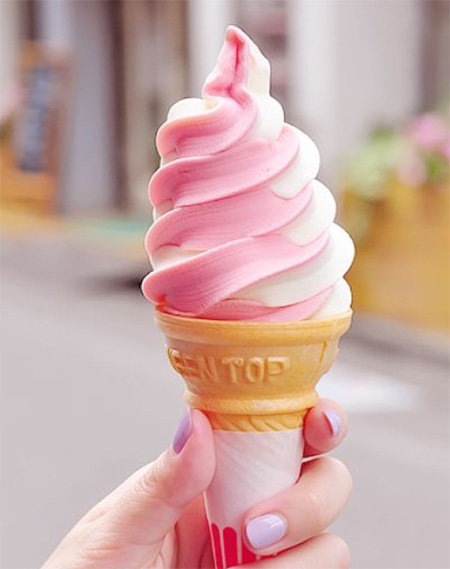

In [ ]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "chocolate.jpg"

# Preview image for context
display(Image(IMAGE_PATH))

#### Base64 Image Processing

In [ ]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me analyze the nutrition data of a photo of my meal"},
        {"role": "user", "content": [
            {"type": "text", "text": "Could you analyze the nutrition data of my meal in Korean?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

이 사진은 소프트 아이스크림입니다. 일반적인 소프트 아이스크림의 영양 정보를 제공해드릴게요.

### 소프트 아이스크림 (약 100g 기준)
- **칼로리**: 약 200-250 kcal
- **탄수화물**: 약 20-30g
- **당류**: 약 15-20g
- **단백질**: 약 3-5g
- **지방**: 약 10-15g
- **포화지방**: 약 6-10g
- **콜레스테롤**: 약 20-30mg
- **나트륨**: 약 50-100mg

이 수치는 대략적인 값이며, 브랜드나 제조 방법에 따라 다를 수 있습니다. 아이스크림은 당과 지방 함량이 높으니 적당히 섭취하는 것이 좋습니다.


In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me analyze the nutrition data of a photo of my meal"},
        {"role": "user", "content": [
            {"type": "text", "text": "이 음식 사진에서 부족한 영양성분을 보충할 수 있는 메뉴 명을 출력해줘"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

이 도넛은 주로 탄수화물과 당분이 많고, 단백질, 식이섬유, 비타민, 미네랄이 부족할 수 있습니다. 이를 보충하기 위해 다음과 같은 메뉴를 고려해보세요:

1. **그릭 요거트와 견과류**: 단백질과 건강한 지방을 보충할 수 있습니다.
2. **신선한 과일 샐러드**: 비타민과 식이섬유를 추가할 수 있습니다.
3. **삶은 달걀**: 단백질과 비타민 D를 보충할 수 있습니다.
4. **채소 스무디**: 다양한 비타민과 미네랄을 섭취할 수 있습니다.

이 메뉴들을 추가하면 영양 균형을 맞추는 데 도움이 될 것입니다.


  
    
      
        
          
            
            여기까지 플젝 관련!!!!!!!
            

#### URL Image Processing

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter of the triangle.

The sides of the triangle are 6, 5, and 9.

1. Calculate the semi-perimeter \( s \):
\[ s = \frac{a + b + c}{2} = \frac{6 + 5 + 9}{2} = 10 \]

2. Use Heron's formula to find the area \( A \):
\[ A = \sqrt{s(s-a)(s-b)(s-c)} \]
\[ A = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ A = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ A = \sqrt{200} \]
\[ A = 10\sqrt{2} \]

So, the area of the triangle is \( 10\sqrt{2} \) square units.


In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown"},
        {"role": "user", "content": [
            {"type": "text", "text": "Can you explain what you see in this image?"},
            {"type": "image_url", "image_url": {
                "url": "https://images.ctfassets.net/kftzwdyauwt9/3Y5UXKbx1ZIQYF4dg585eH/1a6da79d0ab3b8d3a2fd23aae1f21075/gpt-40-01_dark.png"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

This image is a bar chart titled "Text Evaluation" that compares the performance of various models across different evaluation metrics. The models compared are:

- GPT-4o (pink)
- GPT-4T (orange)
- GPT-4 (initial release 23-03-14) (yellow)
- Claude 3 Opus (green)
- Gemini Pro 1.5 (light green)
- Gemini Ultra 1.0 (blue)
- Llama3 400b (purple)

The evaluation metrics are:

1. MMLU (%)
2. GPOQA (%)
3. MATH (%)
4. HumanEval (%)
5. MGSM (%)
6. DROP (f1)

Each metric has a corresponding set of bars representing the performance of each model. Here are some observations:

- **MMLU (%):** GPT-4o has the highest score (88.7%), followed closely by GPT-4T (86.8%) and GPT-4 (initial release) (86.8%).
- **GPOQA (%):** GPT-4o leads with 53.6%, followed by GPT-4T (50.4%). Gemini Ultra 1.0 and Llama3 400b have no data (N/A).
- **MATH (%):** GPT-4o has the highest score (76.6%), followed by GPT-4T (72.6%).
- **HumanEval (%):** GPT-4o leads with 90.2%, followed by GPT-4T (84.9%).
- **MGSM (%):** GPT-4o h

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown"},
        {"role": "user", "content": [
            {"type": "text", "text": "What do you see in this image? How would you describe the emotion shown?"},
            {"type": "image_url", "image_url": {
                "url": "https://pbs.twimg.com/media/GNeb4-Ua8AAuaKp?format=png&name=small"}
            }
        ]}
    ],
    temperature=0.0,
)

# print(response.choices[0].message.content)

The image shows a man with a beard, wearing a green shirt, and smiling. The background appears to be indoors, possibly in a room with warm lighting. The emotion shown in the image can be described as happy or content, as indicated by the man's smile.


In [ ]:
response.choices[0].message.content

"The image shows a man with a beard, wearing a green shirt, and smiling. The background appears to be indoors, possibly in a room with warm lighting. The emotion shown in the image can be described as happy or content, as indicated by the man's smile."

### Function Calling

In [ ]:
import openai
import json

# Mock function to get NBA game scores
def get_nba_game_score(team):
    print('get_nba_game_score called')
    """Get the current score of an NBA game for a given team"""
    if "lakers" in team.lower():
        return json.dumps({"team": "Lakers", "score": "102", "opponent": "Warriors", "opponent_score": "98"})
    elif "bulls" in team.lower():
        return json.dumps({"team": "Bulls", "score": "89", "opponent": "Celtics", "opponent_score": "95"})
    else:
        return json.dumps({"team": team, "score": "N/A", "opponent": "N/A", "opponent_score": "N/A"})

In [ ]:


def funcation_calling():
    # Step 1: Initialize conversation with the user's message
    messages = [{"role": "user", "content": "What's the score of the Lakers game?"}]

    # Define available tools (functions) the model can use
    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_nba_game_score",
                "description": "Get the current score of an NBA game for a given team",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "team": {
                            "type": "string",
                            "description": "The name of the NBA team, e.g. Lakers, Bulls",
                        },
                    },
                    "required": ["team"],
                },
            },
        }
    ]

    # Step 2: Send the conversation context and available tools to the model
    response = client.chat.completions.create(
        model=MODEL,
        messages=messages,
        tools=tools,
        tool_choice="auto",  # auto is default, but we'll be explicit
    )

    # Extract the response from the model
    response_message = response.choices[0].message
    tool_calls = response_message.tool_calls  # Check if the model wants to call any tools

    # Step 3: Check if there are any tool calls requested by the model
    if tool_calls:
        # Define available functions
        available_functions = {
            "get_nba_game_score": get_nba_game_score,
        }  # Only one function in this example, but can be extended

        # Add the model's response to the conversation history
        messages.append(response_message)

        # Step 4: Call the function requested by the model
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)

            print(f"Tool call: {tool_call}")

            # Call the function with the extracted arguments
            function_response = function_to_call(
                team=function_args.get("team"),
            )

            # Add the function response to the conversation history
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response,
                }
            )

        # Step 5: Continue the conversation with the updated history
        second_response = client.chat.completions.create(
            model=MODEL,
            messages=messages,
        )  # Get a new response from the model where it can see the function response

        return second_response

# Run the conversation and print the result
print(funcation_calling())


Tool call: ChatCompletionMessageToolCall(id='call_feWMdmuXR2eZA9eS3P5mH6M0', function=Function(arguments='{"team":"Lakers"}', name='get_nba_game_score'), type='function')
get_nba_game_score called
ChatCompletion(id='chatcmpl-9OenqB69v2nUptcaSTxROWIV4nPk1', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The Lakers won their game with a score of 102 to 98 against the Warriors.', role='assistant', function_call=None, tool_calls=None))], created=1715663746, model='gpt-4o-2024-05-13', object='chat.completion', system_fingerprint='fp_729ea513f7', usage=CompletionUsage(completion_tokens=18, prompt_tokens=73, total_tokens=91))
